<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/RNN-Basics/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
data = pd.read_excel('/content/NPA Accounts.xlsx')

In [32]:
data.head()

,Date,Accounts
0,2023-03-31,9731
1,2024-01-31,16130
2,2024-02-01,16186
3,2024-02-02,16235
4,2024-02-05,16369


In [33]:
values = data['Accounts'].values.reshape(-1,1)

In [34]:
values.shape

(508, 1)

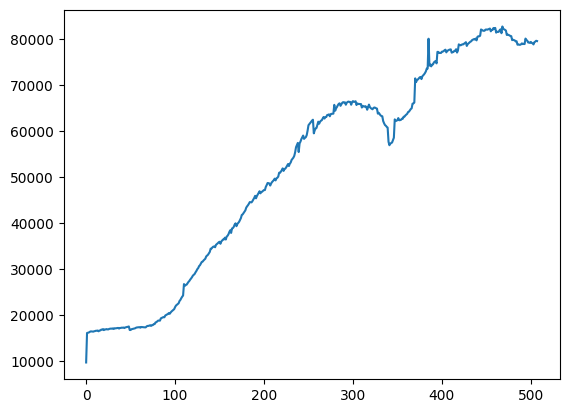

In [37]:
plt.plot(values)
plt.show()

In [38]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled = scaler.fit_transform(values)

In [39]:
window = 7

def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled, window)

X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (501, 7, 1)
y shape: (501, 1)


In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_size = int(len(X) * 0.6)
x_train, x_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [60]:
model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.5040e-04 - mean_absolute_error: 0.0081 - val_loss: 8.6469e-04 - val_mean_absolute_error: 0.0196
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.3256e-04 - mean_absolute_error: 0.0077 - val_loss: 8.9106e-04 - val_mean_absolute_error: 0.0202
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3821e-04 - mean_absolute_error: 0.0087 - val_loss: 5.9947e-04 - val_mean_absolute_error: 0.0127
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.3394e-04 - mean_absolute_error: 0.0083 - val_loss: 7.2696e-04 - val_mean_absolute_error: 0.0165
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.8384e-04 - mean_absolute_error: 0.0075 - val_loss: 5.9708e-04 - val_mean_absolute_error: 0.0126
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.6515e-04 - mean_absolute_error: 0.0066 - val_loss: 7.0357e-04 - val_mean_absolute_error: 0.0159
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 

In [61]:
y_pred_scaled = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


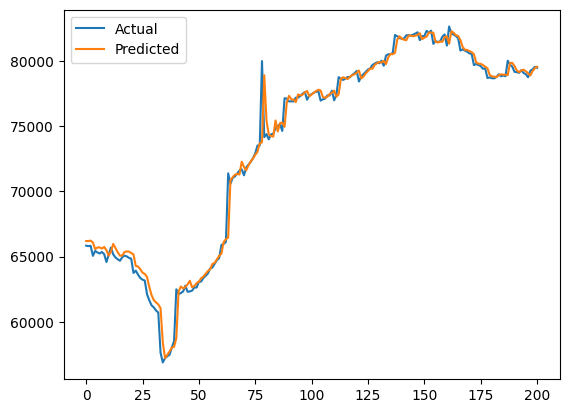

In [62]:
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [63]:
print(mean_squared_error(y_pred, y_test_actual))
print(mean_absolute_error(y_pred, y_test_actual))

766400.6235144319
425.6042249689053


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


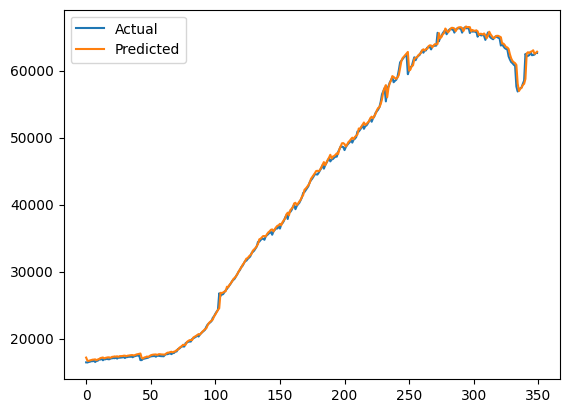

In [58]:
y_train_pred_scaled = model.predict(x_train)
y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
y_train_actual = scaler.inverse_transform(y_train)
plt.plot(y_train_actual, label='Actual')
plt.plot(y_train_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
print(y_test_actual)
print(y_pred)

[[16979.]
 [16903.]
 [16502.]
 [16620.]]
[[16978.848]
 [16859.068]
 [16609.346]
 [16630.975]]


In [ ]:
last_seq = X[-1].reshape(1, window, 1)

In [ ]:
last_seq.shape

(1, 7, 1)

In [ ]:
pred_scaled = model.predict(last_seq)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [ ]:
pred = scaler.inverse_transform(pred_scaled)

In [ ]:
pred

array([[16908.023]], dtype=float32)

In [ ]:
new_seq = np.append(last_seq[:,1:,:], [[pred_scaled[0]]], axis=1)

In [ ]:
last_seq

array([[[0.71752837],
        [0.71500631],
        [0.97982346],
        [0.44010088],
        [0.82345523],
        [0.80832282],
        [1.        ]]])

In [ ]:
new_seq

array([[[0.71500631],
        [0.97982346],
        [0.44010088],
        [0.82345523],
        [0.80832282],
        [1.        ],
        [0.82098901]]])

In [ ]:
pred_scaled_2 = model.predict(new_seq)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
next_pred = scaler.inverse_transform(pred_scaled_2)

In [ ]:
next_pred

array([[16947.621]], dtype=float32)